# The Data Incubator Challenge 2018
## by Maryuri Quintero


The lack of education is decreasing the chances of improvement in many places around the world. When people do not have access to education, they mislead their energy to find success in activities that do not contribute to the society where they live.  The World Bank has provided data regarding the education in more than 200 economies around the world. I propose to analyze the given education data to find the key factors that decrease the opportunities for getting an appropriate education in different parts of the world.

In [0]:
#IMPORTING LIBRARIES
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving EdStatsData.csv to EdStatsData (1).csv
User uploaded file "EdStatsData.csv" with length 326426040 bytes


In [20]:
file_name = "EdStatsData (1).csv"

project = pd.read_csv(file_name)   
 
print(project.shape)             #Number of observations and variables in the dataset

(886930, 70)


#Data Exploration

In [22]:
project.head(5)  # First 5 rows of the dataset

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
project.loc[:,'Country Name':'Indicator Code'].describe()

In [57]:
countries = project.loc[:,['Country Name','Country Code']].drop_duplicates()
print (countries)

                                             Country Name Country Code
0                                              Arab World          ARB
3665                                  East Asia & Pacific          EAS
7330          East Asia & Pacific (excluding high income)          EAP
10995                                           Euro area          EMU
14660                               Europe & Central Asia          ECS
18325       Europe & Central Asia (excluding high income)          ECA
21990                                      European Union          EUU
25655              Heavily indebted poor countries (HIPC)          HPC
29320                                         High income          HIC
32985                           Latin America & Caribbean          LCN
36650   Latin America & Caribbean (excluding high income)          LAC
40315        Least developed countries: UN classification          LDC
43980                                 Low & middle income          LMY
47645 

In [32]:
#Identifying unique indicators 
indicators = project.loc[:,['Indicator Name','Indicator Code']].drop_duplicates()
indicators.head()

,Indicator Name,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR


In [33]:
countries[countries['Country Name'].str.contains('Panama')]

,Country Name,Country Code
641375,Panama,PAN


In [35]:
panama = project.loc[project['Country Code']=='PAN']
panama.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
641375,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641376,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641377,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641378,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641379,Panama,PAN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
panama.shape

(3665, 70)

In [40]:
panama_clean = panama.dropna('index', thresh = 5)
panama_clean.shape

(1982, 70)

In [41]:
panama_clean.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
641375,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641376,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641377,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641378,Panama,PAN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641379,Panama,PAN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values per year

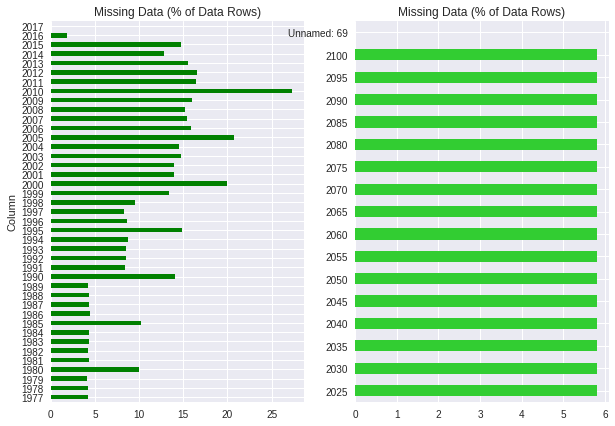

In [48]:
present_missing = project.loc[:,'1977':'2017'].notnull().sum()/len(project)*100
future_missing = project.loc[:,'2025':].notnull().sum()/len(project)*100
plt.figure(figsize=(10,7))
plt.subplot(121)
present_missing.plot(kind='barh', color='green')
plt.title('Missing Data (% of Data Rows)')
plt.ylabel('Column')
plt.subplot(122)
future_missing.plot(kind='barh', color='limegreen')
plt.title('Missing Data (% of Data Rows)')
plt.show()

## Finding the types of PISA assessments

In [56]:
# Indicators with PISA(programme for international student assessment) names
indicators[indicators['Indicator Name'].str.contains('PISA')].head()

,Indicator Name,Indicator Code
2208,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.0
2209,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.1
2210,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.2
2211,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.3
2212,PISA: 15-year-olds by mathematics proficiency ...,LO.PISA.MAT.4


In [0]:
'LO.PISA.MAT.6' 

In [0]:
lo_pisa_mat_6 = project.loc[project['Indicator Name']=='LO.PISA.MAT.6' ]
lo_